In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(86084, 22)

In [4]:
Label = pd.get_dummies(data['Label'],drop_first=True)   #Label is converted into numerical values

In [8]:
X = data.drop(['Label','MAC'], axis = 1) #define the features as X 

In [9]:
y = data['Label'] #define the label as Y

In [10]:
from sklearn.model_selection import train_test_split  #import the data selection libr

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

<AxesSubplot:xlabel='Entropy', ylabel='payload_l'>

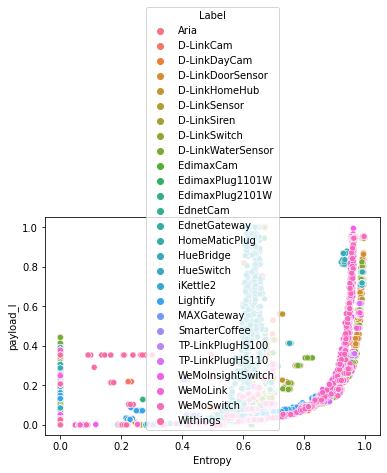

In [12]:
#Normalization
min_train = X_train.min() #get the minimum values of training features
range_train = (X_train-min_train).max()  #get range of the data features
X_train_scaled = (X_train-min_train)/range_train #normalizing the features
sns.scatterplot( x = X_train_scaled['Entropy'], y =X_train_scaled ['payload_l'],hue = 'Label', data = data) #viasualize the particular faetures after

In [13]:
min_test = X_test.min()     #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [14]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss = 'log',max_iter=1000, tol=0.01)

In [15]:
clf.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', tol=0.01)

In [16]:
predictions = clf.predict(X_test_scaled) #test the model performance 

In [17]:
from sklearn.metrics import classification_report,confusion_matrix #import the performanc

In [18]:
print(classification_report(y_test,predictions))  #print the performance of the algo

C:\Users\Mithu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

             Aria       0.00      0.00      0.00        76
        D-LinkCam       0.27      0.69      0.39      1018
     D-LinkDayCam       0.00      0.00      0.00       197
 D-LinkDoorSensor       0.12      0.24      0.16       309
    D-LinkHomeHub       0.16      0.01      0.02      1367
     D-LinkSensor       0.00      0.00      0.00      1074
      D-LinkSiren       0.00      0.00      0.00       993
     D-LinkSwitch       0.00      0.00      0.00      1070
D-LinkWaterSensor       0.16      0.29      0.20      1056
        EdimaxCam       0.00      0.00      0.00       152
  EdimaxPlug1101W       0.00      0.00      0.00       193
  EdimaxPlug2101W       0.00      0.00      0.00       168
         EdnetCam       0.00      0.00      0.00        66
     EdnetGateway       0.00      0.00      0.00       140
    HomeMaticPlug       0.00      0.00      0.00        96
        HueBridge       0.30      0.16      0.21      2

In [19]:
cm = confusion_matrix(y_test,predictions)  #define the confusion matrix as cm

Text(123.0, 0.5, 'True Class')

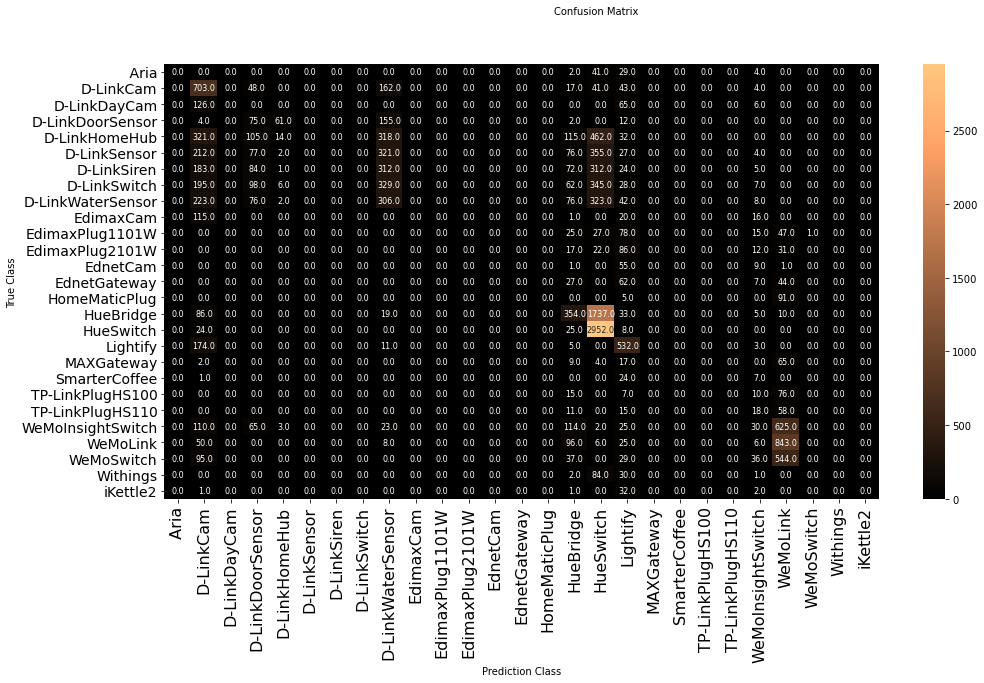

In [20]:
fig=plt.figure(figsize=(16,8))
xticklabel=[' Aria','D-LinkCam', 'D-LinkDayCam', 'D-LinkDoorSensor', 'D-LinkHomeHub','D-LinkSensor','D-LinkSiren','D-LinkSwitch', 'D-LinkWaterSensor' ,'EdimaxCam', 'EdimaxPlug1101W','EdimaxPlug2101W','EdnetCam','EdnetGateway','HomeMaticPlug','HueBridge','HueSwitch','Lightify','MAXGateway','SmarterCoffee','TP-LinkPlugHS100','TP-LinkPlugHS110','WeMoInsightSwitch','WeMoLink','WeMoSwitch', 'Withings','iKettle2']
plt.xticks(fontsize=16)

cm = confusion_matrix(y_test,predictions) #define the confusion matrix as cm
sns.heatmap(cm, annot=True,fmt=".1f",xticklabels =xticklabel, yticklabels=xticklabel,cmap="copper",annot_kws={"size": 8})
plt.yticks(fontsize=14,rotation=0)  #visualize the confusion matrix
fig.suptitle('Confusion Matrix', fontsize=10)
plt.xlabel("Prediction Class",fontsize=10)
plt.ylabel("True Class",fontsize=10)

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc = roc_auc_score(y_test,clf.predict(X_test_scaled))
fpr,tpr,thresholds = roc_curve(y_test,clf.predict_proba(X_test_scaled)[:,1])

C:\Users\Mithu\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
plt.figure()
plt.plot(fpr,tpr,label='KNN model (area = %0.2f)' % Log_ROC_auc)
plt.plot((0,1),(0,1),'r--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()